Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6068 - accuracy: 0.7257 - val_loss: 0.5179 - val_accuracy: 0.7944
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4903 - accuracy: 0.7960 - val_loss: 0.4806 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.7955 - val_loss: 0.4633 - val_accuracy: 0.7959
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4522 - accuracy: 0.7964 - val_loss: 0.4524 - val_accuracy: 0.7940
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4440 - accuracy: 0.7979 - val_loss: 0.4451 - val_accuracy: 0.7986
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4372 - accuracy: 0.8007 - val_loss: 0.4389 - val_accuracy: 0.8001
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4317 - accuracy: 0.8059 - val_loss: 0.4335 - val_accuracy: 0.8023

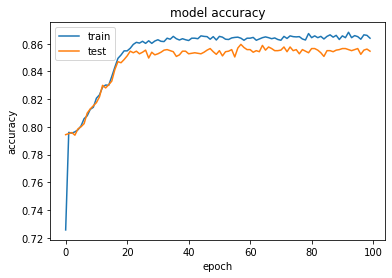

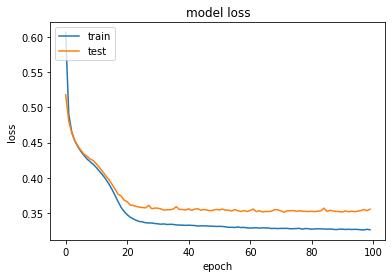

0.858

In [5]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/ANN/customer_churn/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

#__main__:1: UserWarning: Update your `Dense` call to the Keras 2 API: 
#`Dense(activation="relu", input_dim=11, units=6, 
#kernel_initializer="he_uniform")`

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
#classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score



